In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from numbers_parser import Document
from os import path as path
import collections

import Dumbleplot as dp

#### Import Data

In [2]:
spells = dp.Data() 

#### Cast: construct dataset

In [3]:
pathtofile = "/Users/scibook/Eigen/PhD/Experiments/LLPS/20240517 evaporation test"
filename = "evaporation data.numbers"
get_data_from_sheet= "Sheet 1"
table = "CO experiment"

spellbook1 = dp.DataImport(pathtofile, filename)
spellbook1.import_data(get_data_from_sheet, table)
df = spellbook1.df
print(df)

x_data = ["[min]"]
y_data = ["Mean CO exp"]
errorbars = ["std CO exp"]  # None or list: ["errorbar1"]
until_column = 8

spells.get_data(until_column, y_data, x_data, df)
spells.get_errors(until_column, errorbars, y_data, df)

   [min]     well1     well6     well7    well23    well27    well30  \
0    0.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  113.0  1.414300  1.373280  1.387939  1.388370  1.418239  1.434679   
2  172.0  1.749105  1.667449  1.702955  1.678716  1.745557  1.766171   
3  202.0  1.954299  1.840575  1.908996  1.850424  1.936168  1.976982   
4  212.0  2.018470  1.900114  1.977401  1.937878  2.036592  2.048910   
5  219.0  2.072616  1.951776  2.012919  1.974076  2.074611  2.132175   
6  224.0  2.122172  1.987287  2.069120  2.005282  2.113281  2.158853   
7  231.0  2.173278  2.042537  2.087626  2.057483  2.179872  2.206705   
8  264.0  2.478191  2.300983  2.384825  2.339901  2.432562  2.529814   

   Mean CO exp  std CO exp  
0     1.000000    0.000000  
1     1.401335    0.023183  
2     1.724256    0.040919  
3     1.922582    0.055668  
4     1.997935    0.058883  
5     2.042768    0.068617  
6     2.091200    0.068271  
7     2.130452    0.070387  
8     2.408694    

In [4]:
# copy for each dataset you want to display
data_properties = {
    "marker" : "o",  # alternatives: "x", "^", "v", "s", "o"
    "linestyle" : "solid",  # alternatives: "solid", "dotted", "dashdot", "dashed" or "" for no line
    "color": None,  # "None" for default colors, alternative: hexcolors or names (hence "green")
    "regression": False  # None for no regression, "True" for linear regression
}
spells.plot_properties.append(data_properties)

#### Cast: construct dataset

In [5]:
pathtofile = "/Users/scibook/Eigen/PhD/Experiments/LLPS/20240517 evaporation test"
filename = "evaporation data.numbers"
get_data_from_sheet= "Sheet 1"
table = "170 mbar"

spellbook2 = dp.DataImport(pathtofile, filename)
spellbook2.import_data(get_data_from_sheet, table)
df = spellbook2.df
print(df)

x_data = ["min"]
y_data = ["Standard Mixture", "2x concentrated extract w/o PEG8k"]
errorbars = ["None", "None"]  # None or list: ["errorbar1"]
until_column = 5

spells.get_data(until_column, y_data, x_data, df)
spells.get_errors(until_column, errorbars, y_data, df)

     min  Standard Mixture  2x concentrated extract w/o PEG8k
0    0.0              1.00                               1.00
1   60.0              1.17                               1.15
2  120.0              1.41                               1.37
3  180.0              1.73                               1.65
4  240.0              2.17                               2.02


In [6]:
# copy for each dataset you want to display
data_properties = {
    "marker" : "s",  # alternatives: "x", "^", "v", "s", "o"
    "linestyle" : "solid",  # alternatives: "solid", "dotted", "dashdot", "dashed" or "" for no line
    "color": None,  # "None" for default colors, alternative: hexcolors or names (hence "green")
    "regression": False  # None for no regression, "True" for linear regression
}
spells.plot_properties.append(data_properties)

In [7]:
# copy for each dataset you want to display
data_properties = {
    "marker" : "x",  # alternatives: "x", "^", "v", "s", "o"
    "linestyle" : "solid",  # alternatives: "solid", "dotted", "dashdot", "dashed" or "" for no line
    "color": None,  # "None" for default colors, alternative: hexcolors or names (hence "green")
    "regression": False  # None for no regression, "True" for linear regression
}
spells.plot_properties.append(data_properties)

#### Does Data magic

In [8]:
spells.construct_dict()
#spells.delete_nans()

0
1
2


#### Cast: specify the properties of the general plot

In [9]:
# specify the properties of the general plot
plot_properties = {
    "figname" : "evaporation_170mbar",
    "formats" : ["png", "svg"],  # "svg", "png", "jpeg", "bmp"
    "xlabel" : "time [min]",
    "ylabel" : "concentration factor [AU]",
    "x-range" : [None, None],  # [None, None] for default, otherwise [startvalue, endvalue]
    "y-range" : [None, None],  
    "x-ticks" : None,  # specify number of labeld major ticks on each axis, None is automode
    "y-ticks" : None,
    "x-minor" : 2,  # specify number of minor ticks between major ticks, 2 or 5 is best, None is automode
    "y-minor" : 2,
    "xaxis-type": "lin",  # can be set to "lin" or "log"
    "yaxis-type": "lin",
    "fontsizefactor" : 1.2
}

#### Accio Plot

Accio plot!
｡ﾟ.
(◞ꈍ∇ꈍ)⊃━☆ﾟ⋆*⋆.
*｡ﾟ
 . 


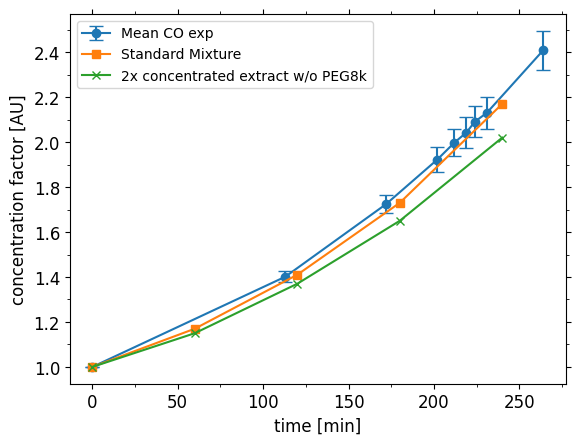

In [10]:
# main plot; all in one
hp = dp.Plotter(plot_properties)
hp.set_limits()
hp.set_major_ticks()
hp.cast_magic()

fig = plt.figure()
ax = fig.add_subplot(111)

# plot datasets
for dataset_nr in spells.dataset:
    properties = spells.dataset[dataset_nr]
    ax.errorbar(properties["xdata"], properties["ydata"], xerr=None, yerr=properties["errorbars"], capsize=5,
                marker = properties["marker"], linestyle = properties["linestyle"], color = properties["color"],
                label = properties["name"])

    # check for regression
    if properties["regression"] is True:
        reg = dp.Regression()
        xdf = pd.DataFrame(properties["xdata"]) #xdf was originally dataset["xdata"] and this line was not here
        ydf = pd.DataFrame(properties["data"]) # problem is only because delete_nans generates list, but if they are changed to df, some more errors occure. URGENT
        y_pred, m, c = reg.linreg(xdf.values.reshape(-1, 1), ydf.values, properties["name"], do_linreg = True)
        ax.plot(xdf, y_pred, color = properties["color"]) # xdf = spells.ydata[0]["xdata"]


# adjust plot
ax.set_xlabel(hp.pp["xlabel"])
ax.set_ylabel(hp.pp["ylabel"])
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.set_xlim(hp.pp["x-range"])
ax.set_ylim(hp.pp["y-range"])

xt, yt = hp.set_lin_log()
ax.set_xscale(xt)
ax.set_yscale(yt)

if hp.pp["xtick_number"] is not None:
    ax.xaxis.set_major_locator(hp.pp["xtick_number"])
if hp.pp["ytick_number"] is not None:
    ax.yaxis.set_major_locator(hp.pp["ytick_number"])

xminor, yminor = hp.minor_locator()
if hp.pp["xaxis-type"] != "log":
    ax.xaxis.set_minor_locator(AutoMinorLocator(xminor))
if hp.pp["yaxis-type"] != "log":
    ax.yaxis.set_minor_locator(AutoMinorLocator(yminor))

ax.yaxis.label.set_size(10*hp.pp["fontsizefactor"])
ax.xaxis.label.set_size(10*hp.pp["fontsizefactor"])
ax.tick_params(axis="x", labelsize = 10*hp.pp["fontsizefactor"])
ax.tick_params(axis="y", labelsize = 10*hp.pp["fontsizefactor"])


##############
#Add user defined stuff here
#ax.axvline(x=375, label="Emission 375 nm", color="red")
#ax.axvspan(370, 380, alpha=0.2, color='red')
##############



legend = ax.legend()

#### Save figure

In [11]:
savepath = path.join(pathtofile, plot_properties["figname"])
for file_format in plot_properties["formats"]:
    fig.savefig(savepath + '.%s' % file_format, dpi=600, format=file_format)